In [15]:
from numpy import dtype
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

Exercise 1

In [16]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

Exercise 2

In [17]:
print(im_org.shape)

(512, 512)


Exercise 3

In [18]:
print(im_org.dtype)

uint8


Exercise 4

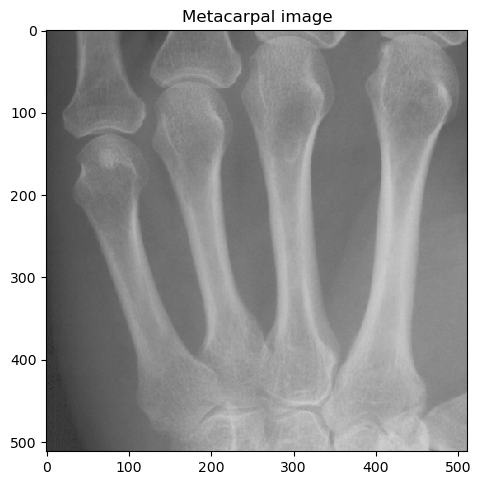

In [19]:
#show image
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

Exercise 5

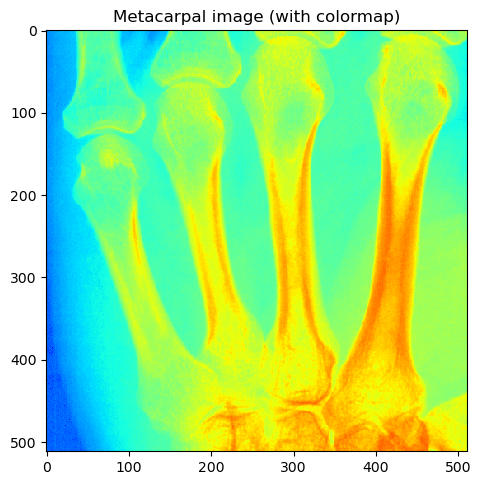

In [20]:
#colormap
io.imshow(im_org, cmap="jet")
plt.title('Metacarpal image (with colormap)')
io.show()

Exercise 6

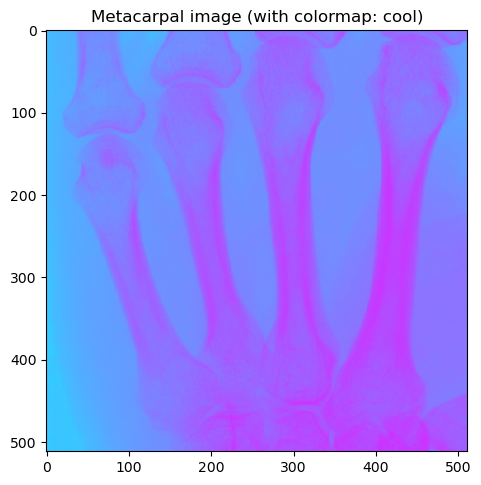

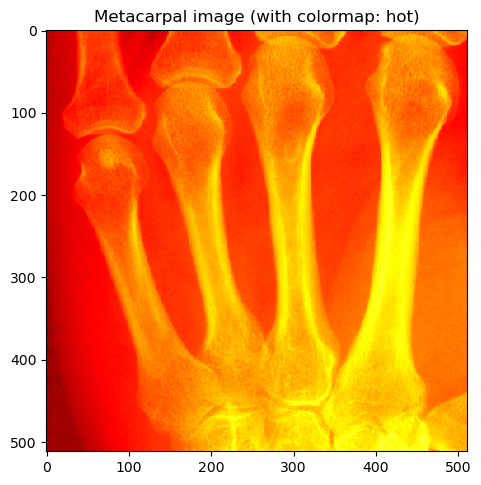

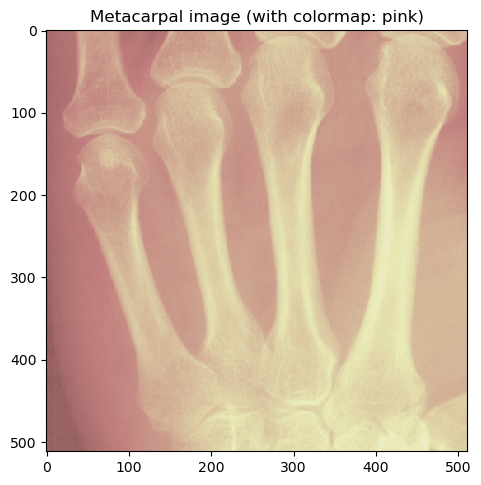

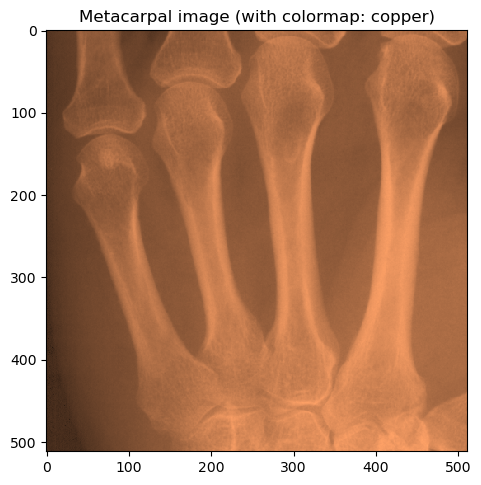

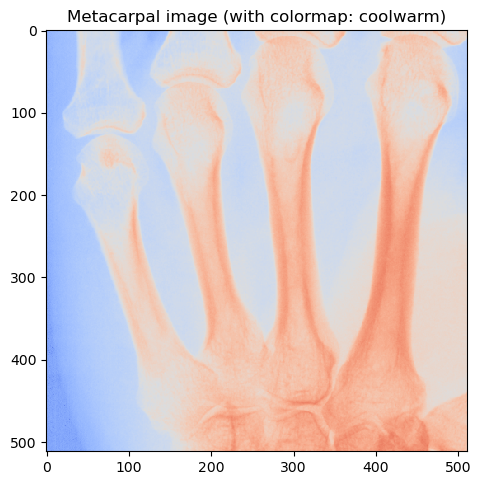

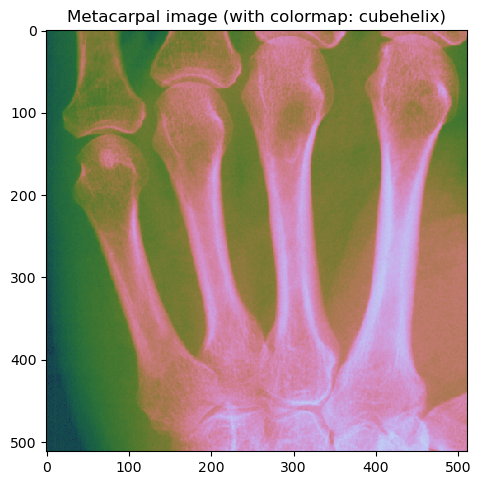

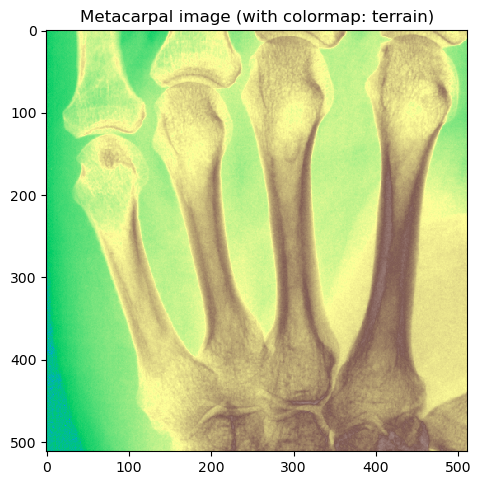

In [21]:
#different colomarps
# Experiment with different colormaps. For example cool, hot, pink, copper, coolwarm, cubehelix, and terrain.

colormaps = ["cool", "hot", "pink", "copper", "coolwarm", "cubehelix", "terrain"]

for cmap in colormaps:
    io.imshow(im_org, cmap=cmap)
    plt.title('Metacarpal image (with colormap: {})'.format(cmap))
    io.show()

Exercise 7

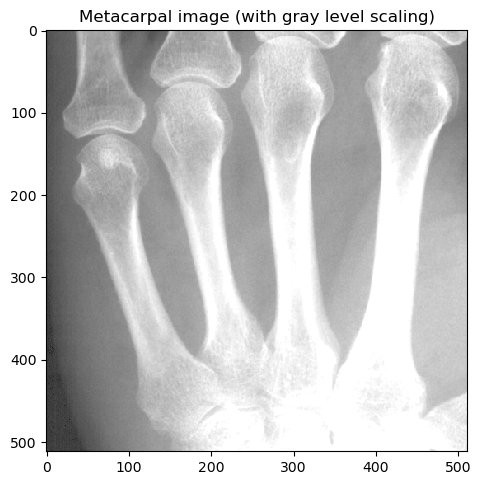

In [22]:
#grey level scaling
io.imshow(im_org, vmin=20, vmax=170)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

Exercise 7b

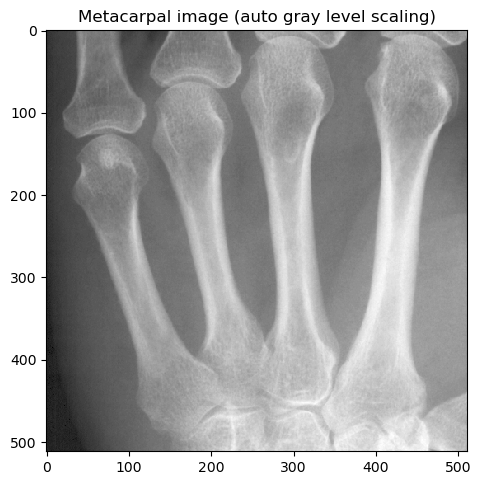

In [23]:
# Automatically scale based on min and max pixel values
io.imshow(im_org, vmin=im_org.min(), vmax=im_org.max())
plt.title('Metacarpal image (auto gray level scaling)')
io.show()

Exercise 8

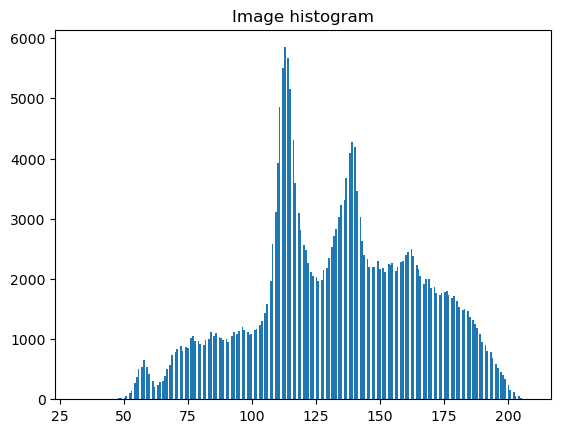

There are 1147.0 pixel values in bin 100
Bin edges: 100.75 to 101.4375


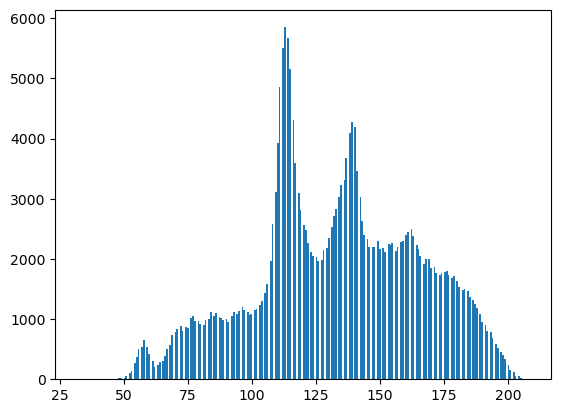

In [24]:
#histogram
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

#bin values
h = plt.hist(im_org.ravel(), bins=256)

#value of given bin
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

#bin edges
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Exercise 8b

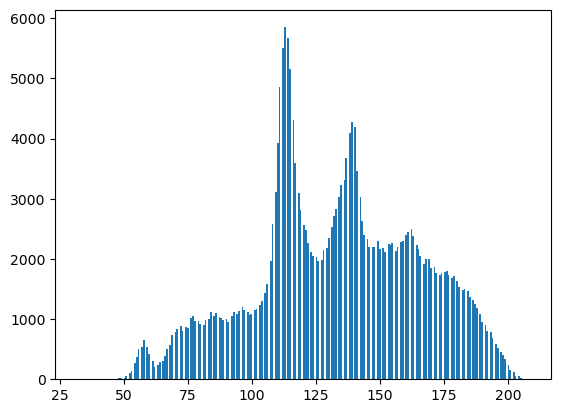

In [25]:
#alternative way for histogram
y, x, _ = plt.hist(im_org.ravel(), bins=256)

Exercise 9

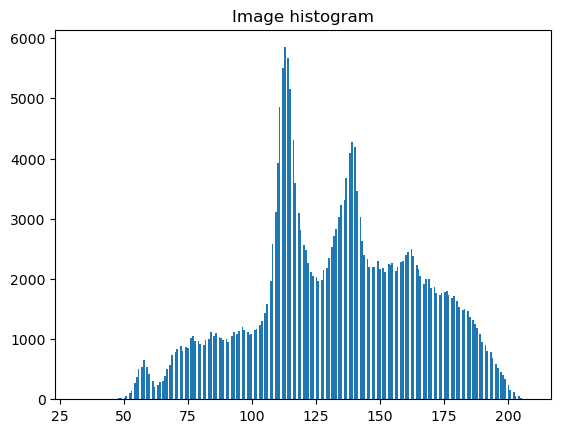

The most common intensity range is: (112.4375, 113.125)


In [26]:
#The most common intensity range
# Flatten image and compute histogram
hist, bin_edges = np.histogram(im_org.ravel(), bins=256)

# Find the bin with the most pixels
max_bin_index = np.argmax(hist)
most_common_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])

# Display histogram
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

# Print the most common intensity range
print(f"The most common intensity range is: {most_common_range}")

Exercise 10

In [27]:
#value of pixel
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


Exercise 11

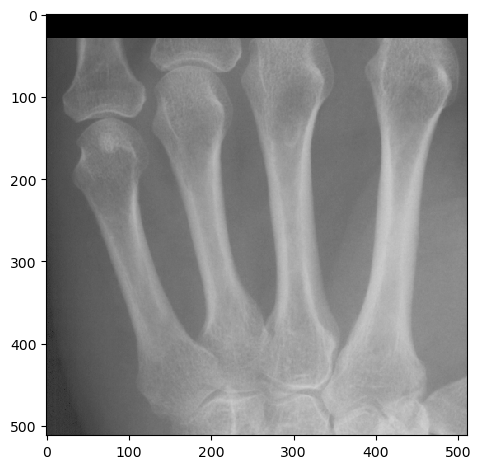

In [28]:
#modifies the image im_org by setting the first 30 rows of the image to black (intensity value 0).
im_org[:30] = 0
io.imshow(im_org)
io.show()

Exercise 12

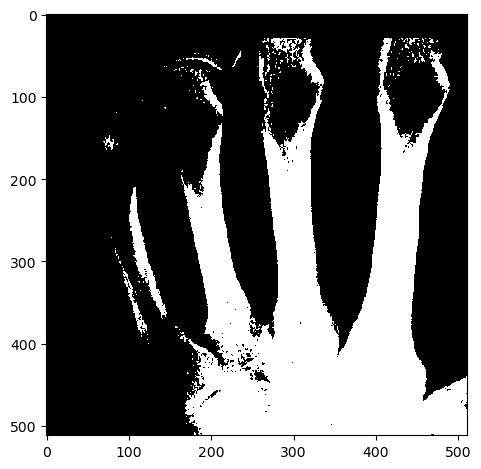

In [29]:
#Mask: binary image tha values are 0/1
mask = im_org > 150
io.imshow(mask)
io.show()

#The bones (fingers, metacarpals) are shown in white, meaning their pixel values are 1.

#The background and areas not part of the bones are black, meaning their pixel values are 0.

Exercise 13

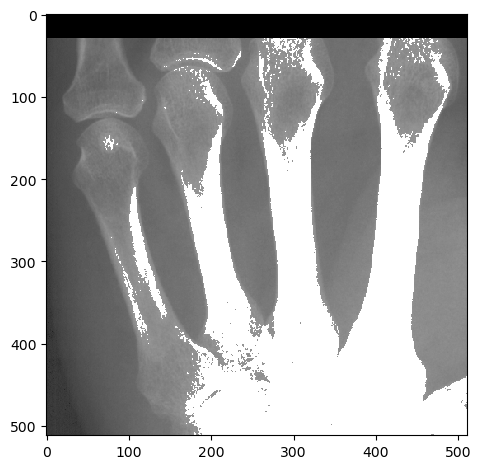

In [30]:
#Set all pixels in im_org where mask is True to the value 255, which corresponds to white in an 8-bit grayscale image.
im_org[mask] = 255
io.imshow(im_org)
io.show()

Exercise 14